In [1]:
import pandas as pd
import numpy as np
import branca.colormap as cm
import math
from sklearn.metrics.pairwise import haversine_distances
from sklearn.mixture import GaussianMixture   #Gaussian Mixture Model

In [2]:
import os
os.listdir(os.getcwd())

['.ipynb_checkpoints',
 'circle_map.html',
 "Dataframe'e Yeni Column Ekleme.ipynb",
 'density_colormap.html',
 'First.ipynb',
 'Traffic_in_Istanbul.ipynb',
 'trafikdensity.csv',
 'trafikdensity.zip']

In [3]:
data = pd.read_csv('trafikdensity.csv',parse_dates=True,index_col=0)

In [4]:
data

,DATE_TIME,LONGITUDE,LATITUDE,GEOHASH,MINIMUM_SPEED,MAXIMUM_SPEED,AVERAGE_SPEED,NUMBER_OF_VEHICLES
_id,,,,,,,,
1,2020-01-03 13:00:00,28.844604,41.113586,sxk9bk,9,78,53,105
2,2020-01-16 07:00:00,29.152222,41.009216,sxk9r3,6,64,27,68
3,2020-01-17 20:00:00,28.471069,41.042175,sxk1rz,53,96,72,11
4,2020-01-14 22:00:00,29.360962,40.816956,sxkbhn,17,128,73,216
5,2020-01-17 20:00:00,28.844604,40.970764,sxk906,16,82,55,123
6,2020-01-20 10:00:00,29.295044,41.108093,sxkcfe,68,152,93,88
7,2020-01-24 16:00:00,28.712769,40.992737,sxk3jq,6,91,49,299
8,2020-01-27 13:00:00,28.899536,41.069641,sxk99s,6,46,15,167
9,2020-01-06 20:00:00,28.822632,40.998230,sxk3pz,6,114,59,287


In [5]:
#converted to datetime object
data['DATE_TIME'] = pd.to_datetime(data['DATE_TIME'], yearfirst=True) 

In [6]:
#Ocak ayının tüm günleri için saat 07:00 ile 21:00 arasındaki veriyi aldık
data = data[data['DATE_TIME'].dt.strftime('%H:%M:%S').between('07:00:00','21:00:00')]

In [7]:
data

,DATE_TIME,LONGITUDE,LATITUDE,GEOHASH,MINIMUM_SPEED,MAXIMUM_SPEED,AVERAGE_SPEED,NUMBER_OF_VEHICLES
_id,,,,,,,,
1,2020-01-03 13:00:00,28.844604,41.113586,sxk9bk,9,78,53,105
2,2020-01-16 07:00:00,29.152222,41.009216,sxk9r3,6,64,27,68
3,2020-01-17 20:00:00,28.471069,41.042175,sxk1rz,53,96,72,11
5,2020-01-17 20:00:00,28.844604,40.970764,sxk906,16,82,55,123
6,2020-01-20 10:00:00,29.295044,41.108093,sxkcfe,68,152,93,88
7,2020-01-24 16:00:00,28.712769,40.992737,sxk3jq,6,91,49,299
8,2020-01-27 13:00:00,28.899536,41.069641,sxk99s,6,46,15,167
9,2020-01-06 20:00:00,28.822632,40.998230,sxk3pz,6,114,59,287
10,2020-01-24 17:00:00,28.976440,41.097107,sxk9g3,6,77,33,277


In [8]:
# Creating hour column according to hour of DATE_TIME 
data['hour']=data['DATE_TIME'].apply(lambda x: x.hour)
data.head()

C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,DATE_TIME,LONGITUDE,LATITUDE,GEOHASH,MINIMUM_SPEED,MAXIMUM_SPEED,AVERAGE_SPEED,NUMBER_OF_VEHICLES,hour
_id,,,,,,,,,
1,2020-01-03 13:00:00,28.844604,41.113586,sxk9bk,9,78,53,105,13
2,2020-01-16 07:00:00,29.152222,41.009216,sxk9r3,6,64,27,68,7
3,2020-01-17 20:00:00,28.471069,41.042175,sxk1rz,53,96,72,11,20
5,2020-01-17 20:00:00,28.844604,40.970764,sxk906,16,82,55,123,20
6,2020-01-20 10:00:00,29.295044,41.108093,sxkcfe,68,152,93,88,10


In [9]:
#Creating weekday in a column
data['weekday'] = data['DATE_TIME'].apply(lambda x: x.weekday())

C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [10]:
data

,DATE_TIME,LONGITUDE,LATITUDE,GEOHASH,MINIMUM_SPEED,MAXIMUM_SPEED,AVERAGE_SPEED,NUMBER_OF_VEHICLES,hour,weekday
_id,,,,,,,,,,
1,2020-01-03 13:00:00,28.844604,41.113586,sxk9bk,9,78,53,105,13,4
2,2020-01-16 07:00:00,29.152222,41.009216,sxk9r3,6,64,27,68,7,3
3,2020-01-17 20:00:00,28.471069,41.042175,sxk1rz,53,96,72,11,20,4
5,2020-01-17 20:00:00,28.844604,40.970764,sxk906,16,82,55,123,20,4
6,2020-01-20 10:00:00,29.295044,41.108093,sxkcfe,68,152,93,88,10,0
7,2020-01-24 16:00:00,28.712769,40.992737,sxk3jq,6,91,49,299,16,4
8,2020-01-27 13:00:00,28.899536,41.069641,sxk99s,6,46,15,167,13,0
9,2020-01-06 20:00:00,28.822632,40.998230,sxk3pz,6,114,59,287,20,0
10,2020-01-24 17:00:00,28.976440,41.097107,sxk9g3,6,77,33,277,17,4


In [11]:
# Filter data for weekdays
data_weekdays = data.loc[(data['DATE_TIME'].dt.weekday != 5) & (data['DATE_TIME'].dt.weekday != 6)]

In [12]:
data_weekdays

,DATE_TIME,LONGITUDE,LATITUDE,GEOHASH,MINIMUM_SPEED,MAXIMUM_SPEED,AVERAGE_SPEED,NUMBER_OF_VEHICLES,hour,weekday
_id,,,,,,,,,,
1,2020-01-03 13:00:00,28.844604,41.113586,sxk9bk,9,78,53,105,13,4
2,2020-01-16 07:00:00,29.152222,41.009216,sxk9r3,6,64,27,68,7,3
3,2020-01-17 20:00:00,28.471069,41.042175,sxk1rz,53,96,72,11,20,4
5,2020-01-17 20:00:00,28.844604,40.970764,sxk906,16,82,55,123,20,4
6,2020-01-20 10:00:00,29.295044,41.108093,sxkcfe,68,152,93,88,10,0
7,2020-01-24 16:00:00,28.712769,40.992737,sxk3jq,6,91,49,299,16,4
8,2020-01-27 13:00:00,28.899536,41.069641,sxk99s,6,46,15,167,13,0
9,2020-01-06 20:00:00,28.822632,40.998230,sxk3pz,6,114,59,287,20,0
10,2020-01-24 17:00:00,28.976440,41.097107,sxk9g3,6,77,33,277,17,4


In [13]:
#Saat 7 ile 11 arası (11 dahil değil)
data_morning = data_weekdays.loc[(data_weekdays['DATE_TIME'].dt.hour < 11)]
data_morning

,DATE_TIME,LONGITUDE,LATITUDE,GEOHASH,MINIMUM_SPEED,MAXIMUM_SPEED,AVERAGE_SPEED,NUMBER_OF_VEHICLES,hour,weekday
_id,,,,,,,,,,
2,2020-01-16 07:00:00,29.152222,41.009216,sxk9r3,6,64,27,68,7,3
6,2020-01-20 10:00:00,29.295044,41.108093,sxkcfe,68,152,93,88,10,0
16,2020-01-16 07:00:00,28.075562,41.075134,sx7cwv,55,129,85,46,7,3
17,2020-01-21 08:00:00,29.020386,41.058655,sxk9s6,6,110,60,231,8,1
35,2020-01-30 10:00:00,28.405151,41.047668,sxk1w2,52,140,74,61,10,3
36,2020-01-01 10:00:00,29.338989,40.981750,sxkc5s,51,106,77,14,10,2
38,2020-01-13 07:00:00,28.800659,41.141052,sxk6p3,15,146,73,135,7,0
40,2020-01-29 10:00:00,28.580933,41.102600,sxk3f6,25,132,83,78,10,2
52,2020-01-28 09:00:00,29.415894,40.783997,sxkbj2,10,101,50,142,9,1


In [14]:
#Öğle 11 ile 15 arası (15 dahil değil)
data_midday = data_weekdays.loc[(data_weekdays['DATE_TIME'].dt.hour < 15) & (data_weekdays['DATE_TIME'].dt.hour >= 11)]
data_midday

,DATE_TIME,LONGITUDE,LATITUDE,GEOHASH,MINIMUM_SPEED,MAXIMUM_SPEED,AVERAGE_SPEED,NUMBER_OF_VEHICLES,hour,weekday
_id,,,,,,,,,,
1,2020-01-03 13:00:00,28.844604,41.113586,sxk9bk,9,78,53,105,13,4
8,2020-01-27 13:00:00,28.899536,41.069641,sxk99s,6,46,15,167,13,0
31,2020-01-17 12:00:00,28.866577,41.014709,sxk92f,6,46,15,81,12,4
32,2020-01-23 11:00:00,29.053345,41.020203,sxk9m5,6,91,34,201,11,3
39,2020-01-08 11:00:00,28.504028,41.124573,sxk3bw,49,146,77,20,11,2
51,2020-01-13 13:00:00,29.031372,41.058655,sxk9sd,6,57,28,40,13,0
62,2020-01-17 14:00:00,28.965454,41.069641,sxk9eh,6,70,33,86,14,4
85,2020-01-03 11:00:00,28.174438,41.119080,sxk1cj,64,128,89,65,11,4
91,2020-01-01 12:00:00,28.657837,41.009216,sxk3k1,31,116,69,135,12,2


In [15]:
#Öğleden sonra 15 ile 18 arası (18 dahil değil)
data_afternoon = data_weekdays.loc[(data_weekdays['DATE_TIME'].dt.hour < 18) & (data_weekdays['DATE_TIME'].dt.hour >= 15)]
data_afternoon

,DATE_TIME,LONGITUDE,LATITUDE,GEOHASH,MINIMUM_SPEED,MAXIMUM_SPEED,AVERAGE_SPEED,NUMBER_OF_VEHICLES,hour,weekday
_id,,,,,,,,,,
7,2020-01-24 16:00:00,28.712769,40.992737,sxk3jq,6,91,49,299,16,4
10,2020-01-24 17:00:00,28.976440,41.097107,sxk9g3,6,77,33,277,17,4
14,2020-01-09 15:00:00,28.822632,41.206970,sxk6rv,36,132,78,114,15,3
19,2020-01-21 17:00:00,28.789673,41.047668,sxk3x0,9,98,44,108,17,1
28,2020-01-22 15:00:00,28.624878,40.998230,sxk35r,7,68,34,41,15,2
42,2020-01-20 15:00:00,29.317017,41.075134,sxkcej,30,94,58,14,15,0
44,2020-01-31 15:00:00,28.383179,41.069641,sxk1tu,48,144,85,125,15,4
45,2020-01-21 17:00:00,29.163208,40.992737,sxk9pw,6,112,29,540,17,1
66,2020-01-17 16:00:00,29.382935,40.932312,sxkbue,58,154,97,22,16,4


In [16]:
#Akşam 18 ile 21 arası (21 dahil)
data_evening = data_weekdays.loc[(data_weekdays['DATE_TIME'].dt.hour <= 21) & (data_weekdays['DATE_TIME'].dt.hour >= 18)]
data_evening

,DATE_TIME,LONGITUDE,LATITUDE,GEOHASH,MINIMUM_SPEED,MAXIMUM_SPEED,AVERAGE_SPEED,NUMBER_OF_VEHICLES,hour,weekday
_id,,,,,,,,,,
3,2020-01-17 20:00:00,28.471069,41.042175,sxk1rz,53,96,72,11,20,4
5,2020-01-17 20:00:00,28.844604,40.970764,sxk906,16,82,55,123,20,4
9,2020-01-06 20:00:00,28.822632,40.998230,sxk3pz,6,114,59,287,20,0
11,2020-01-08 20:00:00,29.141235,40.965271,sxk9p1,23,75,56,32,20,2
12,2020-01-09 21:00:00,29.328003,40.937805,sxkbgk,6,150,68,424,21,3
21,2020-01-24 19:00:00,28.811646,41.174011,sxk6px,56,145,94,132,19,4
25,2020-01-20 21:00:00,28.009644,41.289368,sx7fvk,31,102,65,17,21,0
34,2020-01-10 18:00:00,29.295044,40.904846,sxkbdw,23,64,41,19,18,4
47,2020-01-29 20:00:00,29.097290,40.981750,sxk9nh,6,114,34,574,20,2


In [17]:
# Enlem, boylam, haftaiçi ve saatlere göre gruplandı diğer sütunların ortalaması alındı.
data_morning = data_morning.groupby(['LONGITUDE','LATITUDE','weekday','hour']).mean().reset_index()
data_midday = data_midday.groupby(['LONGITUDE','LATITUDE','weekday','hour']).mean().reset_index()
data_afternoon = data_afternoon.groupby(['LONGITUDE','LATITUDE','weekday','hour']).mean().reset_index()
data_evening = data_evening.groupby(['LONGITUDE','LATITUDE','weekday','hour']).mean().reset_index()

#Örnek olarak data_morning bastırıldı
data_morning

,LONGITUDE,LATITUDE,weekday,hour,MINIMUM_SPEED,MAXIMUM_SPEED,AVERAGE_SPEED,NUMBER_OF_VEHICLES
0,27.965698,40.981750,0,7,68.000000,147.000000,93.000000,12.000000
1,27.965698,40.981750,0,8,66.500000,122.500000,87.000000,12.500000
2,27.965698,40.981750,0,9,62.000000,120.333333,89.666667,15.666667
3,27.965698,40.981750,0,10,56.000000,114.666667,83.333333,15.000000
4,27.965698,40.981750,1,7,61.000000,116.000000,89.500000,12.500000
5,27.965698,40.981750,1,8,61.000000,119.000000,84.666667,16.000000
6,27.965698,40.981750,1,9,63.500000,125.750000,90.750000,15.000000
7,27.965698,40.981750,1,10,65.250000,119.250000,83.750000,14.500000
8,27.965698,40.981750,2,7,65.000000,117.000000,88.000000,11.000000
9,27.965698,40.981750,2,8,61.500000,117.000000,84.000000,13.000000


In [18]:
#Sadece long,lat,number of vehicles sütunları kalsın diye bu kod çalıştırılır.
data_morning = data_morning.drop(columns=['weekday','hour','MINIMUM_SPEED','MAXIMUM_SPEED','AVERAGE_SPEED'])

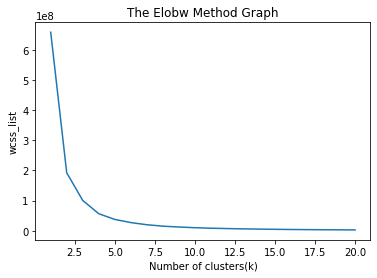

In [23]:
#finding optimal number of clusters using the elbow method  
import matplotlib.pyplot as mtp
from sklearn.cluster import KMeans  
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 20.  
for i in range(1, 21):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(data_morning)  
    wcss_list.append(kmeans.inertia_)  
mtp.plot(range(1, 21), wcss_list)  
mtp.title('The Elbow Method Graph')  
mtp.xlabel('Number of clusters(k)')  
mtp.ylabel('wcss_list')  
mtp.show()  

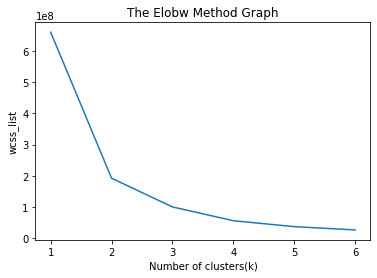

In [24]:
#finding optimal number of clusters using the elbow method  
import matplotlib.pyplot as mtp
from sklearn.cluster import KMeans  
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 8.  
for i in range(1, 7):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(data_morning)  
    wcss_list.append(kmeans.inertia_)  
mtp.plot(range(1, 7), wcss_list)  
mtp.title('The Elbow Method Graph')  
mtp.xlabel('Number of clusters(k)')  
mtp.ylabel('wcss_list')  
mtp.show()  

In [25]:
X = data_morning[['LATITUDE', 'LONGITUDE']].to_numpy()
weights = data_morning['NUMBER_OF_VEHICLES'].to_numpy()
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters=4, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(X,sample_weight=weights)  

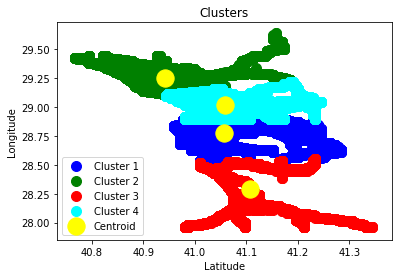

In [32]:
#visulaizing the clusters  
mtp.scatter(X[y_predict == 0, 0], X[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
mtp.scatter(X[y_predict == 1, 0], X[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
mtp.scatter(X[y_predict== 2, 0], X[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster  
mtp.scatter(X[y_predict == 3, 0], X[y_predict == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') #for fourth cluster 
mtp.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
mtp.title('Clusters')  
mtp.xlabel('Latitude')  
mtp.ylabel('Longitude')  
mtp.legend()  
mtp.show()  

In [35]:
#Ağırlık olarak weights'ı vermeden denedim.
Y = data_morning[['LATITUDE', 'LONGITUDE']].to_numpy()
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters=4, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(Y)  

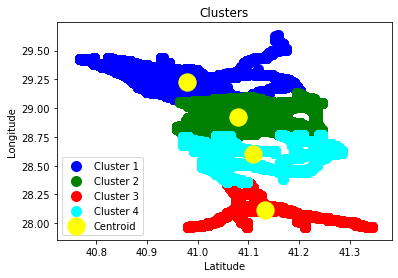

In [36]:
#visulaizing the clusters  
mtp.scatter(Y[y_predict == 0, 0], Y[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
mtp.scatter(Y[y_predict == 1, 0], Y[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
mtp.scatter(Y[y_predict== 2, 0], Y[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster  
mtp.scatter(Y[y_predict == 3, 0], Y[y_predict == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') #for fourth cluster 
mtp.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
mtp.title('Clusters')  
mtp.xlabel('Latitude')  
mtp.ylabel('Longitude')  
mtp.legend()  
mtp.show() 

In [19]:
#Folium kütüphanesi ile haritalara belli bir koordinat verirsek mesela İstanbul haritasına ulaşabileceğiz.
!pip install folium

In [20]:
import folium

In [21]:
#İstanbul haritasını görürüz
harita = folium.Map(location=[41,29],
tiles="cartodbpositron",
width="%100",
height="%100",
zoom_start=10)

harita

In [22]:
#İskele koordinatlarını bir dataframe içinde topluyoruz.
iskeleler = pd.DataFrame({
    'lat':[40.992752,41.083202,41.173462,41.06683,41.040556,41.034828,41.040300,41.07583,41.041084,41.116490,41.044722,40.9522,41.160820,41.050990,41.107280,41.0176,41.10308742259623,41.0472,41.0309,41.0398,41.113950,41.0338,41.074234,41.1002,41.0217,41.030480,41.036910,41.07966,41.04752,41.13449,41.18198,41.16637,41.0468,41.027683,41.003487,40.973122,41.016777,40.972992,41.018234,41.010357,40.918056,40.87471,40.88665,40.814595,41.121834,40.979809,40.995644],
    'lon':[29.023165,29.066652,29.088163,29.043409,28.944722,28.949203,29.005600,29.044,29.007347,29.093240,29.044444,29.0939,29.046200,29.051450,29.080240,28.9751,29.056026935577393,28.9375,28.9525,28.9497,29.059960,28.9933,29.058338,29.06548,28.9767,28.966220,29.029710,29.06541,29.02554,29.091,29.07499,29.05683,28.94104,29.015259,28.957884,28.877699,28.976494,28.716211,28.577883,29.010363,29.128611,29.236231,29.186825,29.302454,29.070221,29.024643,29.018513],
    'name':['Kadıköy','AnadoluHisarı','AnadoluKavağı','Arnavutköy','Ayvansaray', 'Balat','Barbaros Hayrettin Paşa','Bebek','Beşiktaş','Paşabahçe','Beylerbeyi','Bostancı','Büyükdere','Çengelköy','Çubuklu','Eminönü','Emirgan','Eyüp','Fener','Hasköy','İstinye','Kabataş','Kandilli','Kanlıca','Karaköy','Kasımpaşa','Kuzguncuk','Küçüksu','Ortaköy','Beykoz','Rumeli Kavağı','Sarıyer','Sütlüce','Üsküdar','Yenikapı','Bakırköy','Sirkeci','Avcılar','Büyükçekmece','Harem','Maltepe','Pendik','Kartal','Tuzla','Yeniköy','Moda','Haydarpaşa']
}, dtype=str)

iskeleler

,lat,lon,name
0,40.992752,29.023165,Kadıköy
1,41.083202,29.066652,AnadoluHisarı
2,41.173462,29.088163,AnadoluKavağı
3,41.06683,29.043409,Arnavutköy
4,41.040556,28.944722,Ayvansaray
5,41.034828,28.949203,Balat
6,41.0403,29.0056,Barbaros Hayrettin Paşa
7,41.07583,29.044,Bebek
8,41.041084,29.007347,Beşiktaş
9,41.11649,29.09324,Paşabahçe


In [23]:
# add circles of piers one by one on the map
for i in range(0,len(iskeleler)):
   folium.Circle(
      location=[iskeleler.iloc[i]['lat'], iskeleler.iloc[i]['lon']],
      popup=iskeleler.iloc[i]['name'],
      radius=1000,  #meter
      color='#69b3a2',
      fill=True,
      fill_color='#69b3a2',
      fill_opacity=0.2
   ).add_to(harita)

# Show the map again
harita

In [48]:
#ÇALIŞTIRMADIM 

#calculated distance between piers and densities
distance_matrix = haversine_distances(
    iskeleler[['lat', 'lon']],
    data[['LATITUDE', 'LONGITUDE']]
)

In [49]:
distance_matrix = distance_matrix * 6371  #multiply by Earth radius to get kilometers

In [50]:
#Her satır bir iskele. Her sütun, n inci satırdaki iskele koordinatları ile yoğunluğu verilen koordinatların uzaklığı.
print(distance_matrix)
print(distance_matrix.shape)

[[6657.80644901 6657.80644901 6657.80644901 ... 3929.64288713
  3929.64288713 3929.64288713]
 [6898.26962847 6898.26962847 6898.26962847 ... 3511.44366428
  3511.44366428 3511.44366428]
 [7022.81257332 7022.81257332 7022.81257332 ... 3302.68867627
  3302.68867627 3302.68867627]
 ...
 [6914.60439469 6914.60439469 6914.60439469 ... 3445.53992756
  3445.53992756 3445.53992756]
 [6673.63410493 6673.63410493 6673.63410493 ... 3948.67090532
  3948.67090532 3948.67090532]
 [6627.22700089 6627.22700089 6627.22700089 ... 3951.3162134
  3951.3162134  3951.3162134 ]]
(47, 905885)


In [51]:
#İlk iskelenin yoğunluklara uzaklığı. Distance matrix'i anlamak adına alttaki kodları yazdım.
print(distance_matrix[0,:])
print(distance_matrix[0].shape)
print(len(distance_matrix))
print(len(distance_matrix[0]))


[6657.80644901 6657.80644901 6657.80644901 ... 3929.64288713 3929.64288713
 3929.64288713]
(905885,)
47
905885


In [52]:
#1km'den küçük olan uzaklıkları(daire içinde olanları) burada topluyorum ve result denen bir array'e koyuyorum.

mLessThan1 = distance_matrix < 1000
#print(mLessThan1[46,:])
#print(mLessThan1.shape)
# Sum elements <1 across rows
result = np.sum(distance_matrix*mLessThan1, axis=1)
#print(result.shape)
print(result)

#result arrayi artık iskelelerin etrafındaki circle'daki yoğunlukların toplamını verir

#find max value
max = np.max(result)
print(max)

#elements of result divided by max
normalized_data = np.divide(result,max)

[1.89673584e+08 1.76277030e+08 1.07488859e+08 1.76422331e+08
 1.98628431e+08 1.96964376e+08 1.89630124e+08 1.80262907e+08
 1.89789537e+08 1.71299997e+08 1.78491556e+08 1.42396432e+08
 1.31521979e+08 1.73750869e+08 1.72191044e+08 2.00192919e+08
 1.75097086e+08 1.97892430e+08 1.97326789e+08 1.98045049e+08
 1.69749854e+08 1.92261862e+08 1.76974346e+08 1.73627921e+08
 1.99372460e+08 1.96918622e+08 1.83065309e+08 1.77043835e+08
 1.81297844e+08 1.51625816e+08 1.01768599e+08 1.20955952e+08
 1.97229440e+08 1.89071681e+08 1.93362916e+08 1.46756738e+08
 2.00278209e+08 9.66126314e+07 6.03659560e+07 1.92960328e+08
 1.21733764e+08 1.06917519e+08 1.10615763e+08 6.36994954e+07
 1.66000876e+08 1.88317699e+08 1.91626194e+08]
200278208.50040802


In [53]:
#elements of normalized_data is between 0 and 1
print(normalized_data)

[0.94705053 0.88016081 0.53669772 0.8808863  0.99176257 0.98345385
 0.94683353 0.90006251 0.94762949 0.85531021 0.89121806 0.71099314
 0.6566964  0.86754755 0.85975926 0.99957415 0.87426929 0.98808768
 0.9852634  0.98884971 0.84757027 0.95997395 0.88364254 0.86693366
 0.99547755 0.9832254  0.91405506 0.88398951 0.90523001 0.75707596
 0.50813616 0.60393965 0.98477734 0.9440452  0.96547157 0.73276438
 1.         0.48239213 0.30141051 0.96346142 0.60782331 0.53384499
 0.55231053 0.31805505 0.82885141 0.94028053 0.95680002]


In [54]:
colormap = cm.LinearColormap(colors=['green', 'yellow', 'orange', 'red'], vmin=0, vmax=1)

# add colorful circles of piers one by one on the map according to normalized_data
for i in range(0,len(iskeleler)):
   folium.Circle(
      location=[iskeleler.iloc[i]['lat'], iskeleler.iloc[i]['lon']],
      popup=iskeleler.iloc[i]['name'],
      radius=1000,  #meter
      color='#69b3a2',
      fill=True,
      fill_color=colormap(normalized_data[i]),
      fill_opacity=0.2
   ).add_to(harita)

# Show the map again
harita

In [32]:
# create a LinearColorMap and assign colors, vmin, and vmax
# the colormap will show green for 0 density all the way up to red for 500 density
colormap = cm.LinearColormap(colors=['green', 'yellow', 'orange', 'red'], vmin=0, vmax=500)

#added tiny colourful circles one by one. 
for i in range(len(data)):
    folium.Circle(
        location=[data.iloc[i]['LATITUDE'], data.iloc[i]['LONGITUDE']],
        radius=10,
        fill=True,
        color=colormap(data.iloc[i]['NUMBER_OF_VEHICLES']),
        fill_opacity=0.2
    ).add_to(harita)
    
harita.add_child(colormap)

harita.save('density_colormap.html')

In [39]:
#ÇALIŞTIRMADIM

#number of clusters = 47 (piers)
gmm = GaussianMixture(n_components=47)

X = pd.concat([data["LONGITUDE"], data["LATITUDE"]],axis=1)

X

,LONGITUDE,LATITUDE
_id,,
2420,27.965698,40.981750
5852,27.965698,40.981750
8587,27.965698,40.981750
10692,27.965698,40.981750
15807,27.965698,40.981750
27733,27.965698,40.981750
27875,27.965698,40.981750
34767,27.965698,40.981750
42407,27.965698,40.981750


In [61]:
data_firstweek

gmm = GaussianMixture(n_components=10)

X_week1 = pd.concat([data_firstweek["LONGITUDE"], data_firstweek["LATITUDE"],data_firstweek["hour"],data_firstweek["NUMBER_OF_VEHICLES"]],axis=1)

X_week1

,LONGITUDE,LATITUDE,hour,NUMBER_OF_VEHICLES
_id,,,,
8587,27.965698,40.981750,10,22
27875,27.965698,40.981750,13,15
50358,27.965698,40.981750,16,19
91862,27.965698,40.981750,19,20
108545,27.965698,40.981750,15,17
131578,27.965698,40.981750,12,21
151545,27.965698,40.981750,21,18
164841,27.965698,40.981750,9,15
183042,27.965698,40.981750,11,16


In [63]:
#Fit the GMM model for the density dataset which expresses the dataset as a mixture of 47 Gaussian Distribution
gmm.fit(X_week1)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=10, n_init=1,
                precisions_init=None, random_state=None, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

In [70]:
labels = gmm.predict(X_week1)

X_week1['labels']= labels
d0 = X_week1[X_week1['labels']== 0]
d1 = X_week1[X_week1['labels']== 1]
d2 = X_week1[X_week1['labels']== 2]
d3 = X_week1[X_week1['labels']== 3]

In [84]:
d0.reset_index(drop=True, inplace=True)
d1.reset_index(drop=True, inplace=True)
d2.reset_index(drop=True, inplace=True)
d3.reset_index(drop=True, inplace=True)

In [65]:
z_week1 = gmm.score_samples(X_week1) # this method returns log-likehood

In [66]:
z_week1  #the log of the probability density function (PDF)

array([-9.57560103, -9.98329781, -9.51224469, ..., -8.70699385,
       -9.06967813, -8.95198151])

In [67]:
print(z_week1.shape)

(145274,)


In [91]:
z_week1

array([-9.57560103, -9.98329781, -9.51224469, ..., -8.70699385,
       -9.06967813, -8.95198151])

In [47]:
#3 boyutlu (3.boyut zaman)

#number of clusters = 47 (piers)
gmm = GaussianMixture(n_components=47)

#converted datetime to integer for DATE_TIME column
data['DATE_TIME'] = data['DATE_TIME'].apply(lambda x: x.value)

X = pd.concat([data["LONGITUDE"], data["LATITUDE"],data["DATE_TIME"]],axis=1)

X

C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,LONGITUDE,LATITUDE,DATE_TIME
_id,,,
2420,27.965698,40.981750,1578823200000000000
5852,27.965698,40.981750,1578920400000000000
8587,27.965698,40.981750,1577959200000000000
10692,27.965698,40.981750,1579784400000000000
15807,27.965698,40.981750,1578391200000000000
27733,27.965698,40.981750,1580119200000000000
27875,27.965698,40.981750,1578056400000000000
34767,27.965698,40.981750,1578488400000000000
42407,27.965698,40.981750,1579255200000000000


In [53]:
#Fit the GMM model for the density dataset which expresses the dataset as a mixture of 47 Gaussian Distribution
gmm.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=47, n_init=1,
                precisions_init=None, random_state=None, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

In [54]:
gmm.predict(X)

array([44,  8,  0, ..., 26, 24, 13], dtype=int64)

In [55]:
y = gmm.score_samples(X) # this method returns log-likehood

In [57]:
y  #the log of the probability density function (PDF)

array([-40.36525814, -40.20651611, -39.74339556, ..., -39.12115895,
       -38.94427935, -38.64563924])